In [106]:
using Plots
using NCDatasets
using Dates

In [2]:
wrf_path = "C:\\Users\\taats\\Desktop\\";
wrf_file = joinpath(wrf_path, "wrfout_d01_2022-01-01_00");
ds = NCDataset(wrf_file, "r");
t2 = ds["T2"];

T2 (32 × 32 × 67)
  Datatype:    Float32
  Dimensions:  west_east × south_north × Time
  Attributes:
   FieldType            = 104
   MemoryOrder          = XY 
   description          = TEMP at 2 M
   units                = K
   stagger              = 
   coordinates          = XLONG XLAT XTIME


In [3]:
lat = ds["XLAT"][1, :, 1];
lon = ds["XLONG"][:, 1, 1];

In [169]:
plt_grid = heatmap(lon, lat, transpose(t2[:, :, 1] .- 273.15); dpi = 300)
plot(plt_grid, ticks=true)
ylabel!("latitude")  # Menambahkan label sumbu y 
xlabel!("longitude") # Menambahkan label sumbu x
savefig(plt_grid, "C:\\Users\\taats\\Desktop\\jl-t2-grid.png")

"C:\\Users\\taats\\Desktop\\jl-t2-grid.png"

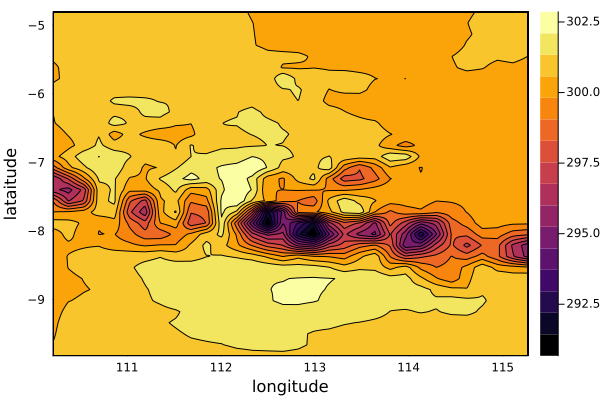

In [159]:
nt = 10 # Indeks waktu = "2022-01-01 09:00:00"
contourf(lon, lat, transpose(t2[:, :, nt]); dpi=300)
xlabel!("longitude")
ylabel!("lataitude")
#savefig("C:\\Users\\taats\\Desktop\\jl-t2-contourf.png");

In [105]:
# Grab time
time = ds["XTIME"]
time[1:end]

67-element Vector{Dates.DateTime}:
 2022-01-01T00:00:00
 2022-01-01T01:01:12
 2022-01-01T02:00:36
 2022-01-01T03:00:00
 2022-01-01T04:01:12
 2022-01-01T05:00:36
 2022-01-01T06:00:00
 2022-01-01T07:01:12.001
 2022-01-01T08:00:36
 2022-01-01T09:00:00
 2022-01-01T10:01:12.001
 2022-01-01T11:00:35.999
 2022-01-01T12:00:00
 ⋮
 2022-01-03T07:01:11.997
 2022-01-03T08:00:36.006
 2022-01-03T09:00:00
 2022-01-03T10:01:11.997
 2022-01-03T11:00:36.006
 2022-01-03T12:00:00
 2022-01-03T13:01:11.997
 2022-01-03T14:00:36.006
 2022-01-03T15:00:00
 2022-01-03T16:01:11.997
 2022-01-03T17:00:36.006
 2022-01-03T18:00:00

In [118]:
ticks = Dates.format.(time, "yyyy-mm-dd HH:MM");

In [150]:
lats_sel = -7.27
lons_sel = 112.73

lat_idx = findall(y -> (y > lats_sel - 0.1) && (y < lats_sel + 0.1), lat)
lon_idx = findall(x -> (x > lons_sel - 0.1) && (x < lons_sel + 0.1), lon)

lons = lon[lon_idx]
lats = lat[lat_idx]

plot(ticks, t2[lon_idx[1], lat_idx[1], 1:length(time)], labels="$(lons[1]); $(lats[1])", xrotation=45; dpi=300)
plot!(ticks, t2[lon_idx[2], lat_idx[1], 1:length(time)],labels="$(lons[2]); $(lats[1])")
ylabel!("Temperature at 2m (°C)")
xlabel!("Time (hourly)")

savefig("C:\\Users\\taats\\Desktop\\jl-t2-time.png")

"C:\\Users\\taats\\Desktop\\jl-t2-time.png"